# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | banff
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | starokostiantyniv
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | northam
Processing Record 9 of Set 1 | grand falls-windsor
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | isla mujeres
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | yorkton
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | mount pleasant
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | port glaud
City not found. Skipping...
Processing Record 21 of Set 1 | touros
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,293.04,79,0,5.04,ZA,1744420048
1,constantia,44.1833,28.6500,277.53,85,100,5.55,RO,1744420049
2,banff,51.1762,-115.5698,283.36,23,0,3.09,CA,1744419785
3,thompson,55.7435,-97.8558,281.44,100,100,3.14,CA,1744420037
4,starokostiantyniv,49.7576,27.2034,274.46,97,100,2.20,UA,1744420053


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,293.04,79,0,5.04,ZA,1744420048
1,constantia,44.1833,28.6500,277.53,85,100,5.55,RO,1744420049
2,banff,51.1762,-115.5698,283.36,23,0,3.09,CA,1744419785
3,thompson,55.7435,-97.8558,281.44,100,100,3.14,CA,1744420037
4,starokostiantyniv,49.7576,27.2034,274.46,97,100,2.20,UA,1744420053


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

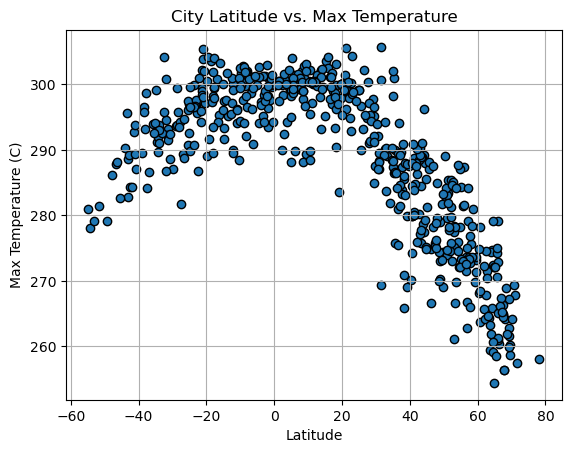

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

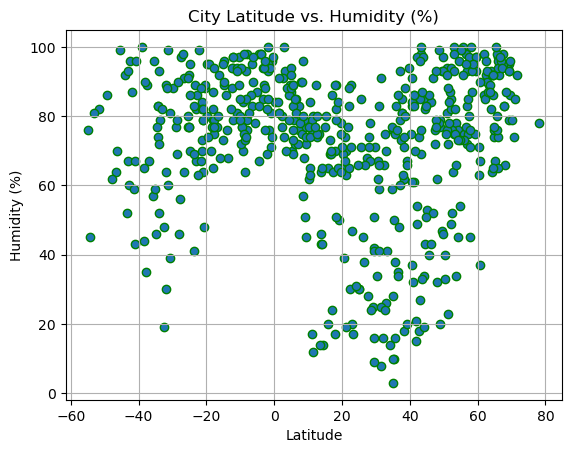

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="green")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

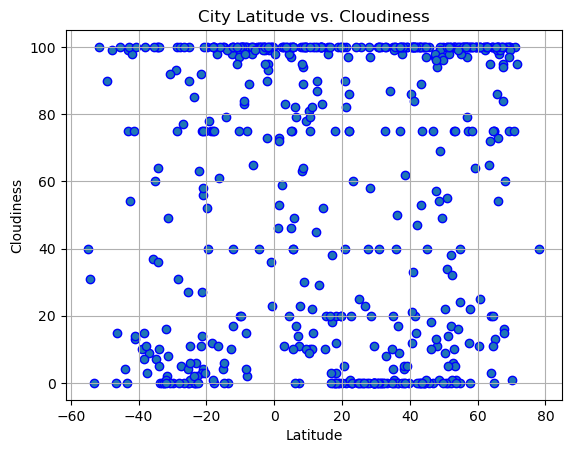

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

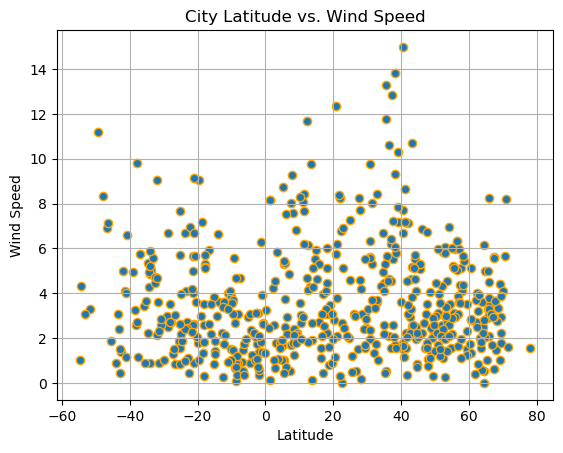

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="orange")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import matplotlib.pyplot as plt
def plot_linear_regression(x_values, y_values, title):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {r_value**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,constantia,44.1833,28.6500,277.53,85,100,5.55,RO,1744420049
2,banff,51.1762,-115.5698,283.36,23,0,3.09,CA,1744419785
3,thompson,55.7435,-97.8558,281.44,100,100,3.14,CA,1744420037
4,starokostiantyniv,49.7576,27.2034,274.46,97,100,2.20,UA,1744420053
6,albany,42.6001,-73.9662,280.14,74,100,2.93,US,1744419626


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,293.04,79,0,5.04,ZA,1744420048
5,grytviken,-54.2811,-36.5092,278.02,45,31,4.32,GS,1744420054
10,edinburgh of the seven seas,-37.0676,-12.3116,286.66,67,9,5.75,SH,1744420060
11,puerto natales,-51.7236,-72.4875,281.44,82,100,3.30,CL,1744420061
13,chonchi,-42.6128,-73.8092,284.33,96,54,1.38,CL,1744420064


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7830146332456338


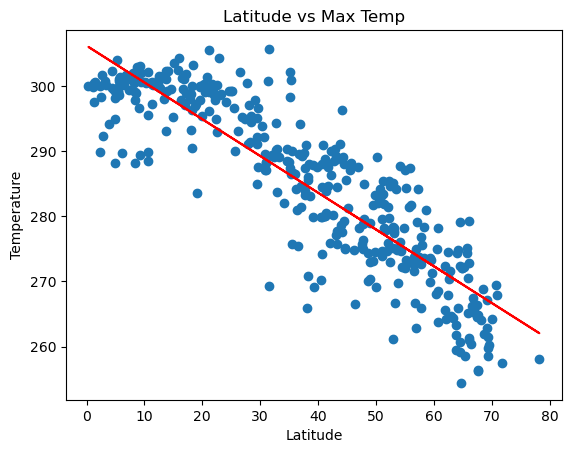

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], "Max Temp")


The r^2-value is: 0.4307422013042003


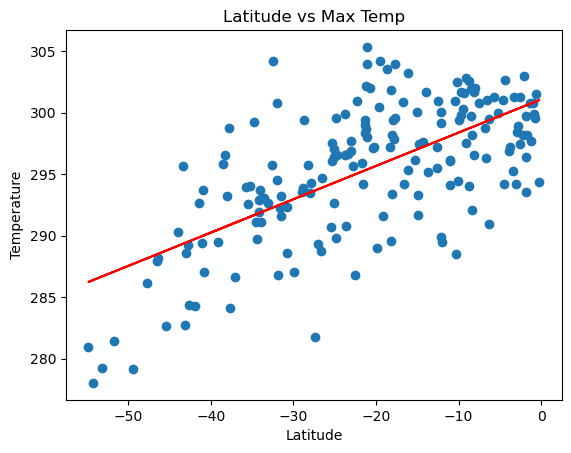

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], "Max Temp")


**Discussion about the linear relationship:** There is a strong negative correlation in the Northern Hemisphere (r² ≈ 0.77), showing that temperatures drop as we move away from the equator.
In the Southern Hemisphere, the correlation is moderate (r² ≈ 0.41), with temperatures increasing closer to the equator.
Overall, latitude clearly affects temperature, especially in the north.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.04374654398418215


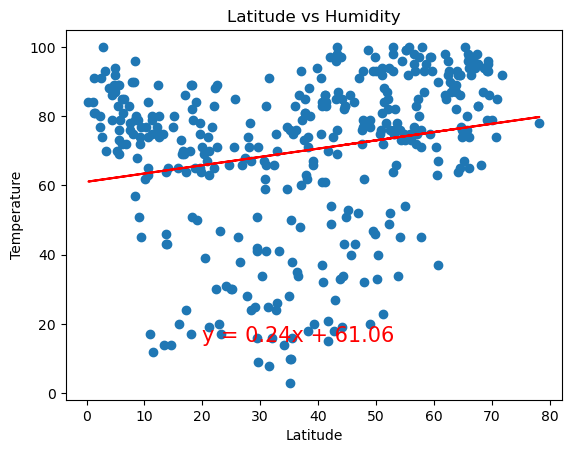

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], "Humidity")


The r^2-value is: 0.12457014030961683


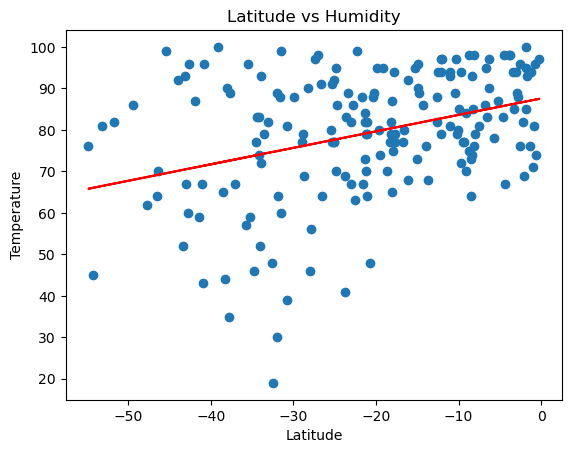

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** In both hemispheres, there is little to no correlation between latitude and humidity (r² < 0.1).
This means latitude doesn't significantly affect humidity levels, which are likely influenced by local weather and geography.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.01909491029684874


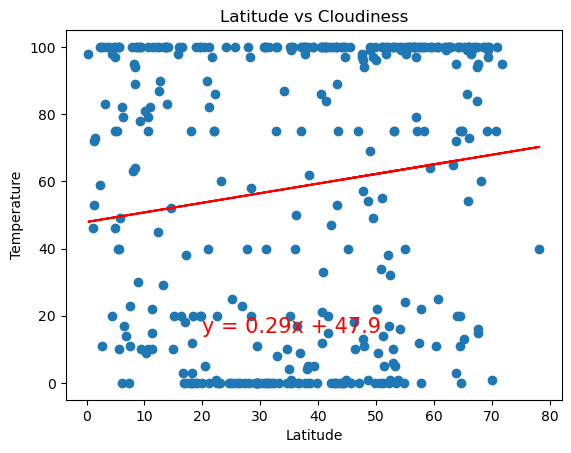

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], "Cloudiness")


The r^2-value is: 0.14263443056990247


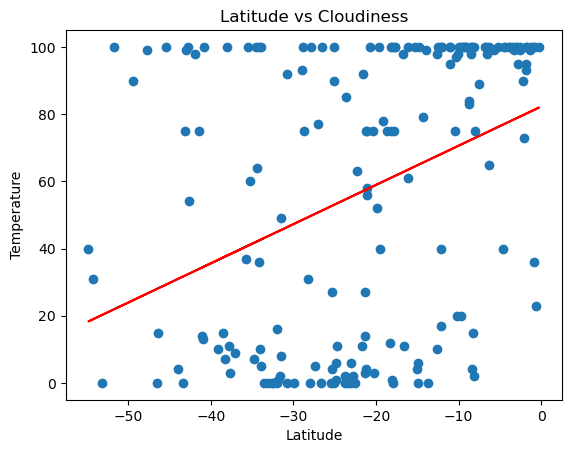

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], "Cloudiness")


**Discussion about the linear relationship:** Both hemispheres show a very weak correlation between latitude and cloudiness (r² < 0.11).
This suggests cloudiness is not strongly influenced by latitude, and is likely affected by local weather systems.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.006292457296390482


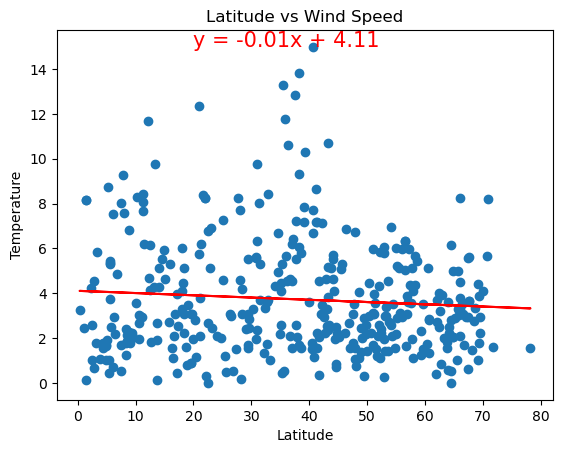

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], "Wind Speed")

The r^2-value is: 0.10639484759188053


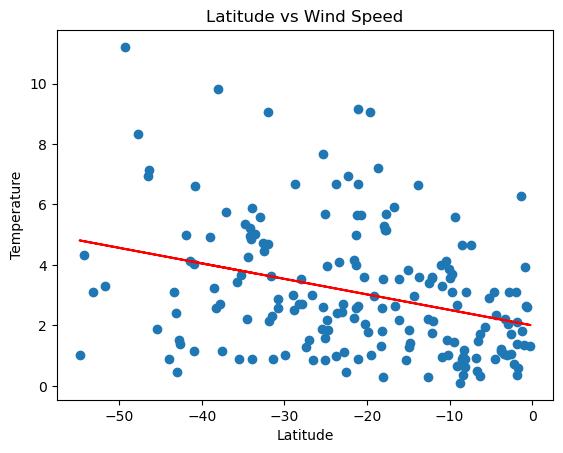

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], "Wind Speed")


**Discussion about the linear relationship:** There is no clear correlation between latitude and wind speed in either hemisphere (r² < 0.1).
This means wind speed is likely affected by local conditions rather than latitude.